<a href="https://colab.research.google.com/github/aravindann92/Electrochemical-Data-Analyzer/blob/main/Peak_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import scipy
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Read the data into data frame
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Peak Finder Project/1_mu_M.txt", delimiter=',')
data.head()

,Potential applied (V),WE(1).Base.Potential (V),WE(1).Base.Current (A),WE(1).Pulse.Current (A),WE(1).δ.Current (A)
0,-0.099945,-0.099670,-0.000026,0.000083,0.000109
1,-0.094910,-0.094727,-0.000023,0.000085,0.000108
2,-0.089874,-0.089630,-0.000021,0.000087,0.000108
3,-0.084839,-0.084656,-0.000020,0.000088,0.000107
4,-0.079803,-0.079651,-0.000018,0.000089,0.000107


In [ ]:
# Get the column names
data.columns

Index(['Potential applied (V)', 'WE(1).Base.Potential (V)',
       'WE(1).Base.Current (A)', 'WE(1).Pulse.Current (A)',
       'WE(1).δ.Current (A)'],
      dtype='object')

In [ ]:
# Strip the potential and current data into separate data frames and merge into a new data frame
potential = pd.DataFrame(data["Potential applied (V)"])
current = pd.DataFrame(data["WE(1).δ.Current (A)"])
mod_data = pd.concat([potential, current], axis=1)
mod_data.head()

,Potential applied (V),WE(1).δ.Current (A)
0,-0.099945,0.000109
1,-0.094910,0.000108
2,-0.089874,0.000108
3,-0.084839,0.000107
4,-0.079803,0.000107


In [ ]:
# Alternate way to create mod_data data frame
#mod_data1 = pd.DataFrame(data, columns= ['Potential applied (V)', 'WE(1).δ.Current (A)'])
#mod_data1.head()

In [ ]:
# Rename columns for ease of handling
mod_data = mod_data.rename(columns={'Potential applied (V)': 'Potential(V)', 'WE(1).δ.Current (A)': 'Current(A)'})
mod_data.head()

,Potential(V),Current(A)
0,-0.099945,0.000109
1,-0.094910,0.000108
2,-0.089874,0.000108
3,-0.084839,0.000107
4,-0.079803,0.000107


In [ ]:
# Convert the potential to list
potential_list = mod_data['Potential(V)'].values.tolist()

In [ ]:
# Convert the current to list
current_list = mod_data['Current(A)'].values.tolist()

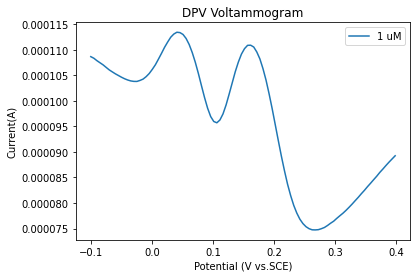

In [ ]:
# Plot the data frame
mod_data.plot(kind='line', x='Potential(V)', y='Current(A)')

plt.title("DPV Voltammogram")
plt.xlabel("Potential (V vs.SCE)")
plt.ylabel("Current(A)")
plt.legend(["1 uM"])

plt.show()

In [ ]:
# Find the peaks

from scipy.signal import find_peaks

peaks,_= find_peaks(mod_data['Current(A)'])
peaks

array([28, 52])

In [ ]:
# Get the peak values

x= [potential_list[i] for i in peaks]
y= [current_list[i] for i in peaks]
print(x, y)

[0.041046142578125, 0.161895751953125] [0.0001134478759765, 0.0001109069824218]


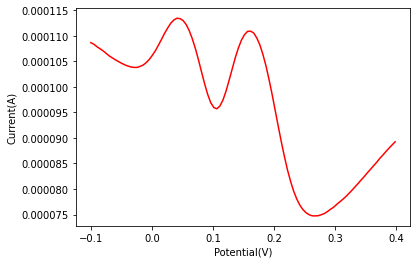

In [ ]:
sns.lineplot(x='Potential(V)', y='Current(A)', color='r', data=mod_data)

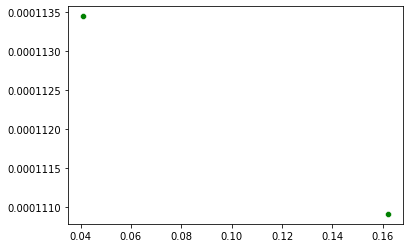

In [ ]:
sns.scatterplot(x=x, y=y, color='g')

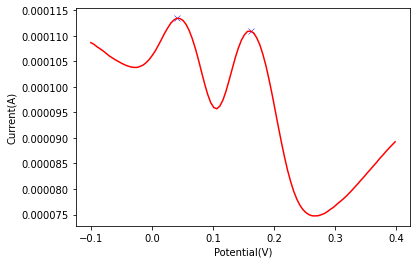

In [ ]:
ax1 = sns.lineplot(x='Potential(V)', y='Current(A)', color='r', data=mod_data, legend="full")
ax2 = sns.scatterplot(x=x, y=y, color='b', marker='x')

In [ ]:
# Load the csv or txt files in the given directory

csvs = [x for x in os.listdir('/content/drive/My Drive/Colab Notebooks/Peak Finder Project/EChem_Data') if x.endswith('.txt')]

In [ ]:
csvs

['100_mu_M.txt',
 '150_mu_M.txt',
 '10_mu_M.txt',
 '1_mu_M.txt',
 '250_mu_M.txt',
 '300_mu_M.txt',
 '20_mu_M.txt',
 '200_mu_M.txt',
 '350_mu_M.txt',
 '40_mu_M.txt',
 '450_mu_M.txt',
 '500_mu_M.txt',
 '60_mu_M.txt',
 '400_mu_M.txt',
 '5_mu_M.txt',
 '600_mu_M.txt',
 '80_mu_M.txt',
 '550_mu_M.txt',
 '0.5_mu_M.txt']

In [ ]:
# Create a list of file names for legends
fns = [os.path.splitext(os.path.basename(x))[0] for x in csvs]

In [ ]:
fns

['100_mu_M',
 '150_mu_M',
 '10_mu_M',
 '1_mu_M',
 '250_mu_M',
 '300_mu_M',
 '20_mu_M',
 '200_mu_M',
 '350_mu_M',
 '40_mu_M',
 '450_mu_M',
 '500_mu_M',
 '60_mu_M',
 '400_mu_M',
 '5_mu_M',
 '600_mu_M',
 '80_mu_M',
 '550_mu_M',
 '0.5_mu_M']

In [ ]:
csv_files = os.listdir('/content/drive/My Drive/Colab Notebooks/Peak Finder Project/EChem_Data')
csv_files

['100_mu_M.txt',
 '150_mu_M.txt',
 '10_mu_M.txt',
 '1_mu_M.txt',
 '250_mu_M.txt',
 '300_mu_M.txt',
 '20_mu_M.txt',
 '200_mu_M.txt',
 '350_mu_M.txt',
 '40_mu_M.txt',
 '450_mu_M.txt',
 '500_mu_M.txt',
 '60_mu_M.txt',
 '400_mu_M.txt',
 '5_mu_M.txt',
 '600_mu_M.txt',
 '80_mu_M.txt',
 '550_mu_M.txt',
 '0.5_mu_M.txt']

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Peak Finder Project/EChem_Data')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Peak Finder Project/EChem_Data'

In [ ]:
# Load the files into separate dataframes

dict_csvs = {}
for i in range(len(fns)):  # loop over files

   # read csv into a dataframe and add it to dict with file_name as its key
   dict_csvs[fns[i]] = pd.read_csv(csvs[i])

In [ ]:
dict_csvs.keys()

dict_keys(['100_mu_M', '150_mu_M', '10_mu_M', '1_mu_M', '250_mu_M', '300_mu_M', '20_mu_M', '200_mu_M', '350_mu_M', '40_mu_M', '450_mu_M', '500_mu_M', '60_mu_M', '400_mu_M', '5_mu_M', '600_mu_M', '80_mu_M', '550_mu_M', '0.5_mu_M'])

In [ ]:
dict_csvs['1_mu_M'].head()

,Potential applied (V),WE(1).Base.Potential (V),WE(1).Base.Current (A),WE(1).Pulse.Current (A),WE(1).δ.Current (A)
0,-0.099945,-0.099701,-0.000008,0.000023,0.000031
1,-0.094910,-0.094635,-0.000007,0.000024,0.000031
2,-0.089874,-0.089600,-0.000005,0.000025,0.000031
3,-0.084839,-0.084595,-0.000004,0.000026,0.000030
4,-0.079803,-0.079590,-0.000003,0.000027,0.000030


In [ ]:
mod_csvs = {}

for keys in dict_csvs.keys():
  mod_csvs[keys] = pd.DataFrame(data = dict_csvs[keys], columns= ['Potential applied (V)', 'WE(1).δ.Current (A)'])

In [ ]:
mod_csvs.keys()

dict_keys(['100_mu_M', '150_mu_M', '10_mu_M', '1_mu_M', '250_mu_M', '300_mu_M', '20_mu_M', '200_mu_M', '350_mu_M', '40_mu_M', '450_mu_M', '500_mu_M', '60_mu_M', '400_mu_M', '5_mu_M', '600_mu_M', '80_mu_M', '550_mu_M', '0.5_mu_M'])

In [ ]:
mod_csvs['300_mu_M'].head()

,Potential applied (V),WE(1).δ.Current (A)
0,-0.099945,0.000041
1,-0.094910,0.000041
2,-0.089874,0.000040
3,-0.084839,0.000040
4,-0.079803,0.000039


In [ ]:
for keys in mod_csvs.keys():
   mod_csvs[keys].rename(columns={'Potential applied (V)': 'Potential(V)', 'WE(1).δ.Current (A)': 'Current(A)'}, inplace=True)

In [ ]:
mod_csvs['1_mu_M'].head()

,Potential(V),Current(A)
0,-0.099945,0.000031
1,-0.094910,0.000031
2,-0.089874,0.000031
3,-0.084839,0.000030
4,-0.079803,0.000030


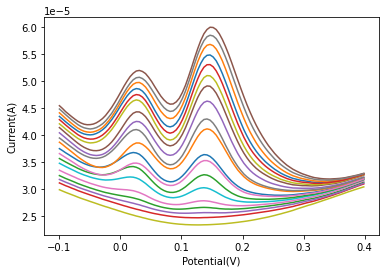

In [ ]:
for keys in mod_csvs.keys():
  ax1 = sns.lineplot(x='Potential(V)', y='Current(A)', data=mod_csvs[keys], legend="full")

[0.041046142578125, 0.161895751953125] [3.5382080078125e-05, 3.42071533203125e-05]
[0.041046142578125, 0.161895751953125] [3.7841796875e-05, 3.90838623046875e-05]
[0.041046142578125, 0.161895751953125] [2.76309204101563e-05, 2.63607788085938e-05]
[0.041046142578125, 0.161895751953125] [2.5841064453125e-05, 2.48101806640625e-05]
[0.041046142578125, 0.161895751953125] [4.1510009765625e-05, 4.37957763671875e-05]
[0.041046142578125, 0.161895751953125] [4.33990478515625e-05, 4.66552734375e-05]
[0.041046142578125, 0.161895751953125] [2.88308715820312e-05, 2.73104858398438e-05]
[0.041046142578125, 0.161895751953125] [3.97216796875e-05, 4.0399169921875e-05]
[0.041046142578125, 0.161895751953125] [4.52392578125e-05, 4.85992431640625e-05]
[0.041046142578125, 0.161895751953125] [3.10281372070313e-05, 2.908935546875e-05]
[0.041046142578125, 0.161895751953125] [4.749755859375e-05, 5.26580810546875e-05]
[0.041046142578125, 0.161895751953125] [4.88861083984375e-05, 5.4931640625e-05]
[0.04104614257812

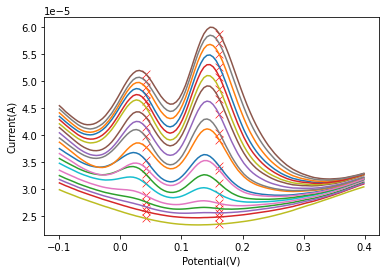

In [ ]:
# Find the peaks

from scipy.signal import find_peaks

#new_peaks=[]
for keys in mod_csvs.keys():
  new_peaks,_= find_peaks(mod_csvs[keys]['Current(A)'])

  # Convert the current and potential values to list
  new_potential_list = mod_csvs[keys]['Potential(V)'].values.tolist()
  new_current_list = mod_csvs[keys]['Current(A)'].values.tolist()
  
  # Get the peak values

  x= list(new_potential_list[i] for i in peaks)
  y= list(new_current_list[i] for i in peaks)
  print(x, y)

  #index= mod_csvs.keys()
  #data = pd.DataFrame({'HQ_Peak_Potential(V)':HQ_peak_V,'CC_Peak_Potential(V)':CC_peak_V,'HQ_Peak_Current(uA)':HQ_peak_A,'CC_Peak_Current(uA)':CC_peak_A},index=index)
  # Plot the graphs along with the peaks

  ax1 = sns.lineplot(x='Potential(V)', y='Current(A)', data=mod_csvs[keys], legend="full")
  ax2 = sns.scatterplot(x=x, y=y, color='r', marker='x', s=60)

In [ ]:
def peak_list():
  #for keys in mod_csvs.keys():
  new_peaks,_= find_peaks(mod_csvs[keys]['Current(A)'])

  # Convert the current and potential values to list
  new_potential_list = mod_csvs[keys]['Potential(V)'].values.tolist()
  new_current_list = mod_csvs[keys]['Current(A)'].values.tolist()
  
  # Get the peak values

  x= list(new_potential_list[i] for i in peaks)
  y= list(new_current_list[i] for i in peaks)

  return x,y

In [ ]:
keys_list = list(mod_csvs.keys())
keys_list

['100_mu_M',
 '150_mu_M',
 '10_mu_M',
 '1_mu_M',
 '250_mu_M',
 '300_mu_M',
 '20_mu_M',
 '200_mu_M',
 '350_mu_M',
 '40_mu_M',
 '450_mu_M',
 '500_mu_M',
 '60_mu_M',
 '400_mu_M',
 '5_mu_M',
 '600_mu_M',
 '80_mu_M',
 '550_mu_M',
 '0.5_mu_M']

In [ ]:
x_val = list()
x_vals = list()
y_val = list()
y_vals = list()
for keys in mod_csvs.keys():
  x_val,_ = peak_list()
  _,y_val = peak_list()
  x_vals.append(x_val)
  y_vals.append(y_val)

print(x_vals, y_vals)
index= mod_csvs.keys()
pot_df = pd.DataFrame(data=x_vals, columns=['HQ_Peak_Potential(V)', 'CC_Peak_Potential(V)'], index=index)
cur_df = pd.DataFrame(data=y_vals, columns=['HQ_Peak_Current(A)', 'CC_Peak_Current(A)'], index=index)
peak_df = pot_df.join(cur_df)
peak_df

[[0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125], [0.041046142578125, 0.161895751953125]] [[3.5382080078125e-05, 3.42071533203125e-05], [3.7841796875e-05, 3.90838623046875e-05], [2.76309204101563e-05, 2.63607788085938e-05], [2.5841064453125e-05, 2.48101806640625e-05], [4.1510009765625e-05, 4.37957763671875e-05], [4.339904785156

,HQ_Peak_Potential(V),CC_Peak_Potential(V),HQ_Peak_Current(A),CC_Peak_Current(A)
100_mu_M,0.041046,0.161896,0.000035,0.000034
150_mu_M,0.041046,0.161896,0.000038,0.000039
10_mu_M,0.041046,0.161896,0.000028,0.000026
1_mu_M,0.041046,0.161896,0.000026,0.000025
250_mu_M,0.041046,0.161896,0.000042,0.000044
300_mu_M,0.041046,0.161896,0.000043,0.000047
20_mu_M,0.041046,0.161896,0.000029,0.000027
200_mu_M,0.041046,0.161896,0.000040,0.000040
350_mu_M,0.041046,0.161896,0.000045,0.000049
40_mu_M,0.041046,0.161896,0.000031,0.000029


In [ ]:
import re

mu = '\u03BC'

def LegendNameSetter(filename):
    if "_mu_" in filename:
        for i, c in enumerate(filename):
            if c.isdigit():
                continue
            if re.search(r'\.',c):
              continue
            else:
                index_of_digit = i
                break

        alpha_in_filename = filename[index_of_digit:]
        converted_filename = filename[:index_of_digit] + mu + alpha_in_filename.strip("_mu_")
        
        return converted_filename

    elif "_n_" in filename:
        for i, c in enumerate(filename):
            if c.isdigit():
                continue
            if re.search(r'\.',c):
                continue
            else:
                index_of_digit = i
                break

        alpha_in_filename = filename[index_of_digit:]
        converted_filename = filename[:index_of_digit] + 'n' + alpha_in_filename.strip("_n_")

        return converted_filename
    else:
        return filename

In [ ]:
concentration_file_names = list()
concentration_list = list()
for i in keys_list:
  concentration_file_names = LegendNameSetter(i)
  concentration_list.append(concentration_file_names)

concentration_list

['100μM',
 '150μM',
 '10μM',
 '1μM',
 '250μM',
 '300μM',
 '20μM',
 '200μM',
 '350μM',
 '40μM',
 '450μM',
 '500μM',
 '60μM',
 '400μM',
 '5μM',
 '600μM',
 '80μM',
 '550μM',
 '0.5μM']

In [ ]:
concentration_values = [s.replace('μM','') for s in concentration_list]
concentration_values = [float(i) for i in concentration_values]
concentration_values

[100.0,
 150.0,
 10.0,
 1.0,
 250.0,
 300.0,
 20.0,
 200.0,
 350.0,
 40.0,
 450.0,
 500.0,
 60.0,
 400.0,
 5.0,
 600.0,
 80.0,
 550.0,
 0.5]

In [ ]:
peak_df['Çoncentration(\u03BCM)'] = np.array(concentration_values)
peak_df

,HQ_Peak_Potential(V),CC_Peak_Potential(V),HQ_Peak_Current(A),CC_Peak_Current(A),Çoncentration(μM)
100_mu_M,0.041046,0.161896,0.000035,0.000034,100.0
150_mu_M,0.041046,0.161896,0.000038,0.000039,150.0
10_mu_M,0.041046,0.161896,0.000028,0.000026,10.0
1_mu_M,0.041046,0.161896,0.000026,0.000025,1.0
250_mu_M,0.041046,0.161896,0.000042,0.000044,250.0
300_mu_M,0.041046,0.161896,0.000043,0.000047,300.0
20_mu_M,0.041046,0.161896,0.000029,0.000027,20.0
200_mu_M,0.041046,0.161896,0.000040,0.000040,200.0
350_mu_M,0.041046,0.161896,0.000045,0.000049,350.0
40_mu_M,0.041046,0.161896,0.000031,0.000029,40.0


In [ ]:
peak_df.sort_values(by='Çoncentration(μM)', ascending=True, inplace=True)
peak_df

,HQ_Peak_Potential(V),CC_Peak_Potential(V),HQ_Peak_Current(A),CC_Peak_Current(A),Çoncentration(μM)
0.5_mu_M,0.041046,0.161896,0.000025,0.000023,0.5
1_mu_M,0.041046,0.161896,0.000026,0.000025,1.0
5_mu_M,0.041046,0.161896,0.000027,0.000026,5.0
10_mu_M,0.041046,0.161896,0.000028,0.000026,10.0
20_mu_M,0.041046,0.161896,0.000029,0.000027,20.0
40_mu_M,0.041046,0.161896,0.000031,0.000029,40.0
60_mu_M,0.041046,0.161896,0.000033,0.000031,60.0
80_mu_M,0.041046,0.161896,0.000034,0.000033,80.0
100_mu_M,0.041046,0.161896,0.000035,0.000034,100.0
150_mu_M,0.041046,0.161896,0.000038,0.000039,150.0


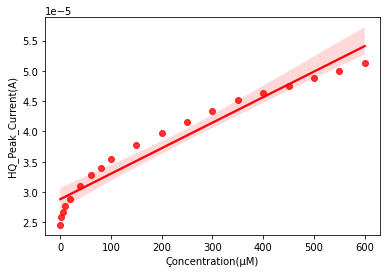

In [ ]:
sns.regplot(data=peak_df, x=peak_df['Çoncentration(μM)'], y=peak_df['HQ_Peak_Current(A)'], color='red');

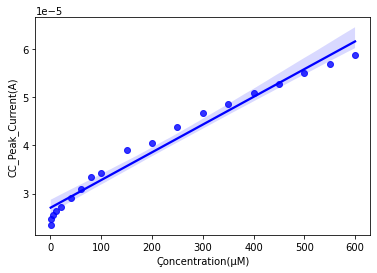

In [ ]:
sns.regplot(data=peak_df, x=peak_df['Çoncentration(μM)'], y=peak_df['CC_Peak_Current(A)'], color='blue');

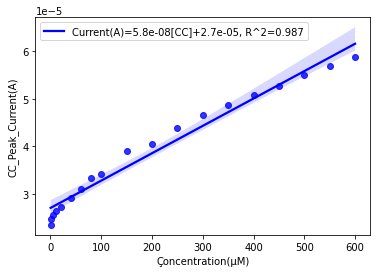

In [ ]:
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(peak_df['Çoncentration(μM)'], peak_df['CC_Peak_Current(A)'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Çoncentration(μM)", y="CC_Peak_Current(A)", data=peak_df, color='b',  line_kws={'label':"Current(A)={0:.2g}[CC]+{1:.2g}, R^2={2:.3f}".format(slope,intercept, r_value)})

# plot legend
ax.legend(loc='upper left')

plt.show()